In [114]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import veda
import seaborn as sns
import importlib

### Make fake dataset

In [115]:
def make_dataset(size: int=1000, na_percentage: float=0.15, n_feat=8):
    X, y = make_classification(n_samples=size, n_features=n_feat, n_classes=2)
    df = pd.DataFrame(X, columns=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"[:n_feat]))
    df["target"]:np.ndarray = y
    for col in df.columns:
        index_sampled = df[col].sample(int(size * (na_percentage + np.random.randint(-3,3)/100))).index
        df.loc[index_sampled, col] = pd.NA # type: ignore
    
    return df


In [116]:
data = make_dataset()
data.head()

,A,B,C,D,E,F,G,H,target
0,0.813773,-0.108738,-0.738361,0.037395,0.350938,0.113911,0.079660,0.583280,1.0
1,0.642234,-0.708068,-0.908207,0.248620,1.035203,-0.989985,1.130791,1.123736,1.0
2,-0.128482,-1.674123,0.960364,0.703960,-1.020234,-2.724968,-1.068381,-1.138174,0.0
3,NaN,0.064441,2.466051,0.959225,-1.055123,1.157475,-0.065884,-1.869352,0.0
4,0.505100,1.168589,-0.930796,-1.003107,-0.130513,-0.461493,-0.879979,0.349628,0.0


# Test VEDA

## Missing data

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


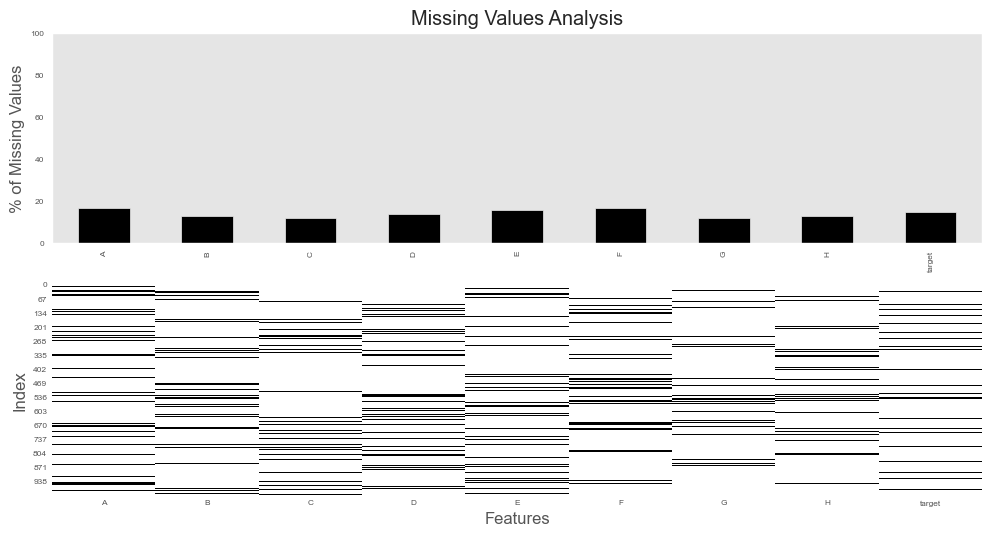

In [117]:
plt.style.use("ggplot")
importlib.reload(veda)

veda.viz_missing(df=data, fig_size=(12, 6))

In [118]:
plt.style.use("ggplot")
importlib.reload(veda)

veda.viz_missing_interactive(df=data)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


## Distributions

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


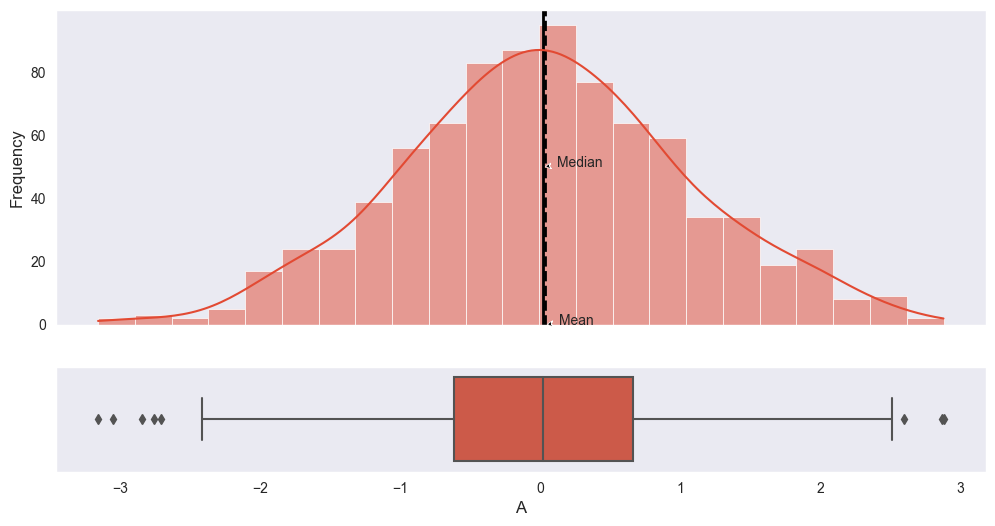

In [119]:
importlib.reload(veda)
veda.viz_distribution(data=data, x_target="A", use_density=True, cumulate=False, fig_size=(12, 6))

## Correlations

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


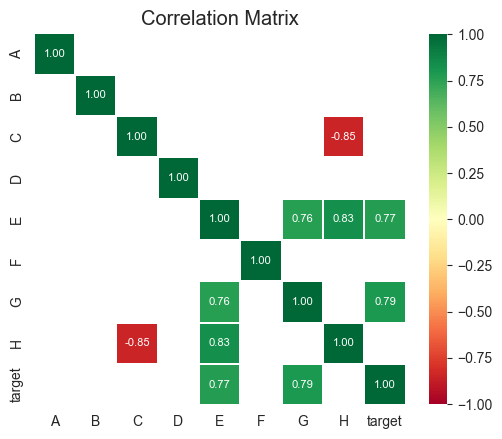

In [120]:
importlib.reload(veda)
veda.viz_correlations(data=data, cutoff=.5, fig_size=6)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<Figure size 700x700 with 0 Axes>

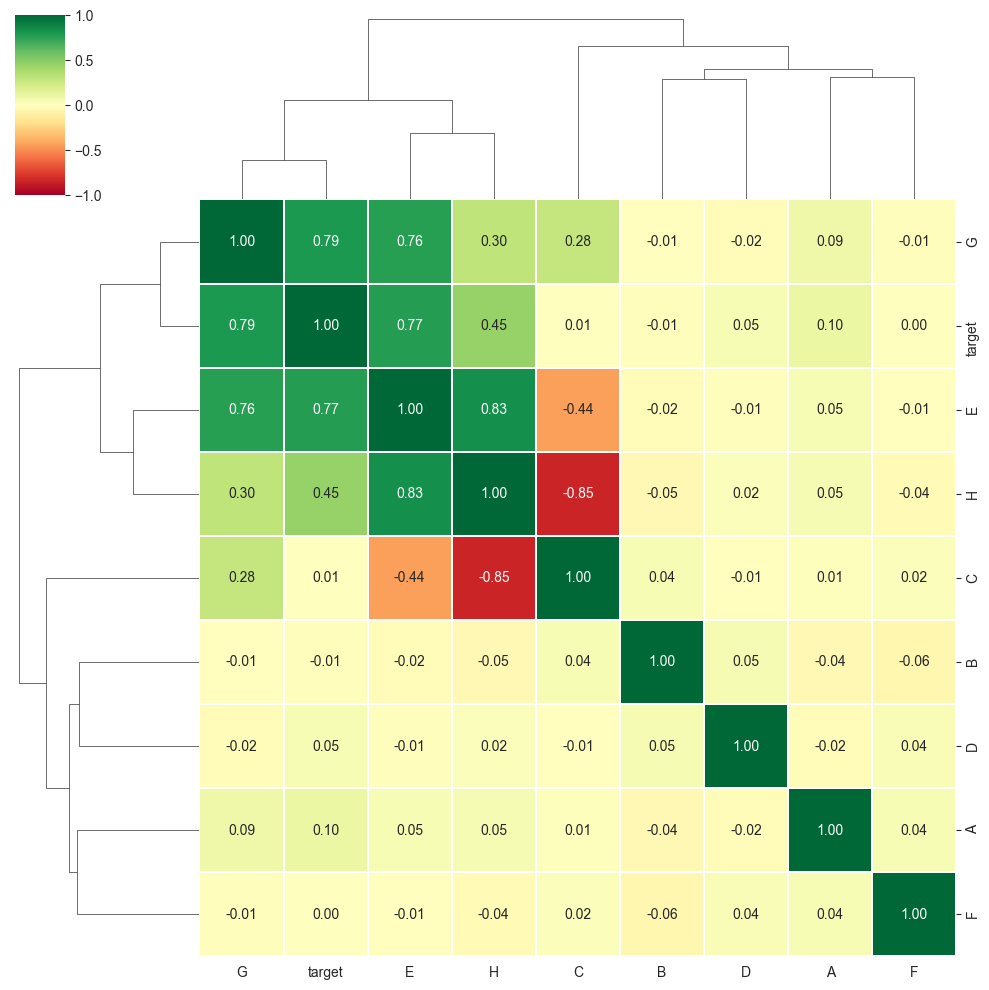

In [121]:
importlib.reload(veda)
veda.viz_clusters_correlations(data=data, cutoff=.0)

In [122]:
veda.viz_correlation_interactive(data=data, cutoff=.0)